In [3]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import pickle

# Formatting

## Apply these settings to all

In [30]:
colors = ['#421639','#1b3c31','#a26629','#9a7565','#e5e5e5','#674460','#48625a','#a0a0a0']
sns.set_palette(sns.color_palette(colors))
sns.set_context('poster', font_scale=1.2)
plt.figure(figsize=(20,10))

'''
sns.set_style('white',{'axes.grid': 'False'})
plt.rcParams.update({'text.color':'white',
                    'axes.labelcolor':'white', 
                    'xtick.color':'white',
                    'ytick.color':'white',
                    'axes.edgecolor':'white'})
'''
plt.tight_layout()
#plt.xlabel(labelpad=20)
#plt.ylabel(labelpad=20)

<Figure size 1440x720 with 0 Axes>

In [7]:
# Load data
with open('ffu_demographics_cleaned','rb') as read_file:
    df = pickle.load(read_file)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 805 entries, 0 to 804
Data columns (total 11 columns):
 #   Column                                                  Non-Null Count  Dtype 
---  ------                                                  --------------  ----- 
 0   How do you identify? (Race and Ethnicity)               801 non-null    object
 1   race_category                                           805 non-null    object
 2   Are you looking for a new role or opportunity?          803 non-null    object
 3   What are your top 3 needs as a womxn of color at work?  773 non-null    object
 4   Billing Zip                                             776 non-null    object
 5   Job Title                                               805 non-null    object
 6   Job_Title_Grouped                                       805 non-null    object
 7   Career_Level                                            787 non-null    object
 8   Industry                                          

In [11]:
with open('ffu_career_levels_df','rb') as read_file:
    df_mergeFounders = pickle.load(read_file)
df_mergeFounders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 805 entries, 0 to 804
Data columns (total 11 columns):
 #   Column                                                  Non-Null Count  Dtype 
---  ------                                                  --------------  ----- 
 0   How do you identify? (Race and Ethnicity)               801 non-null    object
 1   race_category                                           805 non-null    object
 2   Are you looking for a new role or opportunity?          803 non-null    object
 3   What are your top 3 needs as a womxn of color at work?  773 non-null    object
 4   Billing Zip                                             776 non-null    object
 5   Job Title                                               805 non-null    object
 6   Job_Title_Grouped                                       805 non-null    object
 7   Career_Level                                            787 non-null    object
 8   Industry                                          

In [10]:
with open('ffu_industry_df','rb') as read_file:
    df_industry = pickle.load(read_file)
df_industry.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 805 entries, 0 to 804
Data columns (total 11 columns):
 #   Column                                                  Non-Null Count  Dtype 
---  ------                                                  --------------  ----- 
 0   How do you identify? (Race and Ethnicity)               801 non-null    object
 1   race_category                                           805 non-null    object
 2   Are you looking for a new role or opportunity?          803 non-null    object
 3   What are your top 3 needs as a womxn of color at work?  773 non-null    object
 4   Billing Zip                                             776 non-null    object
 5   Job Title                                               805 non-null    object
 6   Job_Title_Grouped                                       805 non-null    object
 7   Career_Level                                            787 non-null    object
 8   Industry                                          

In [25]:
with open('ffu_new_role_df','rb') as read_file:
    df_new_role = pickle.load(read_file)
df_new_role.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3 entries, 0 to 2
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   unique_values  3 non-null      object
 1   counts         3 non-null      int64 
dtypes: int64(1), object(1)
memory usage: 176.0+ bytes


## Seeking Next Role

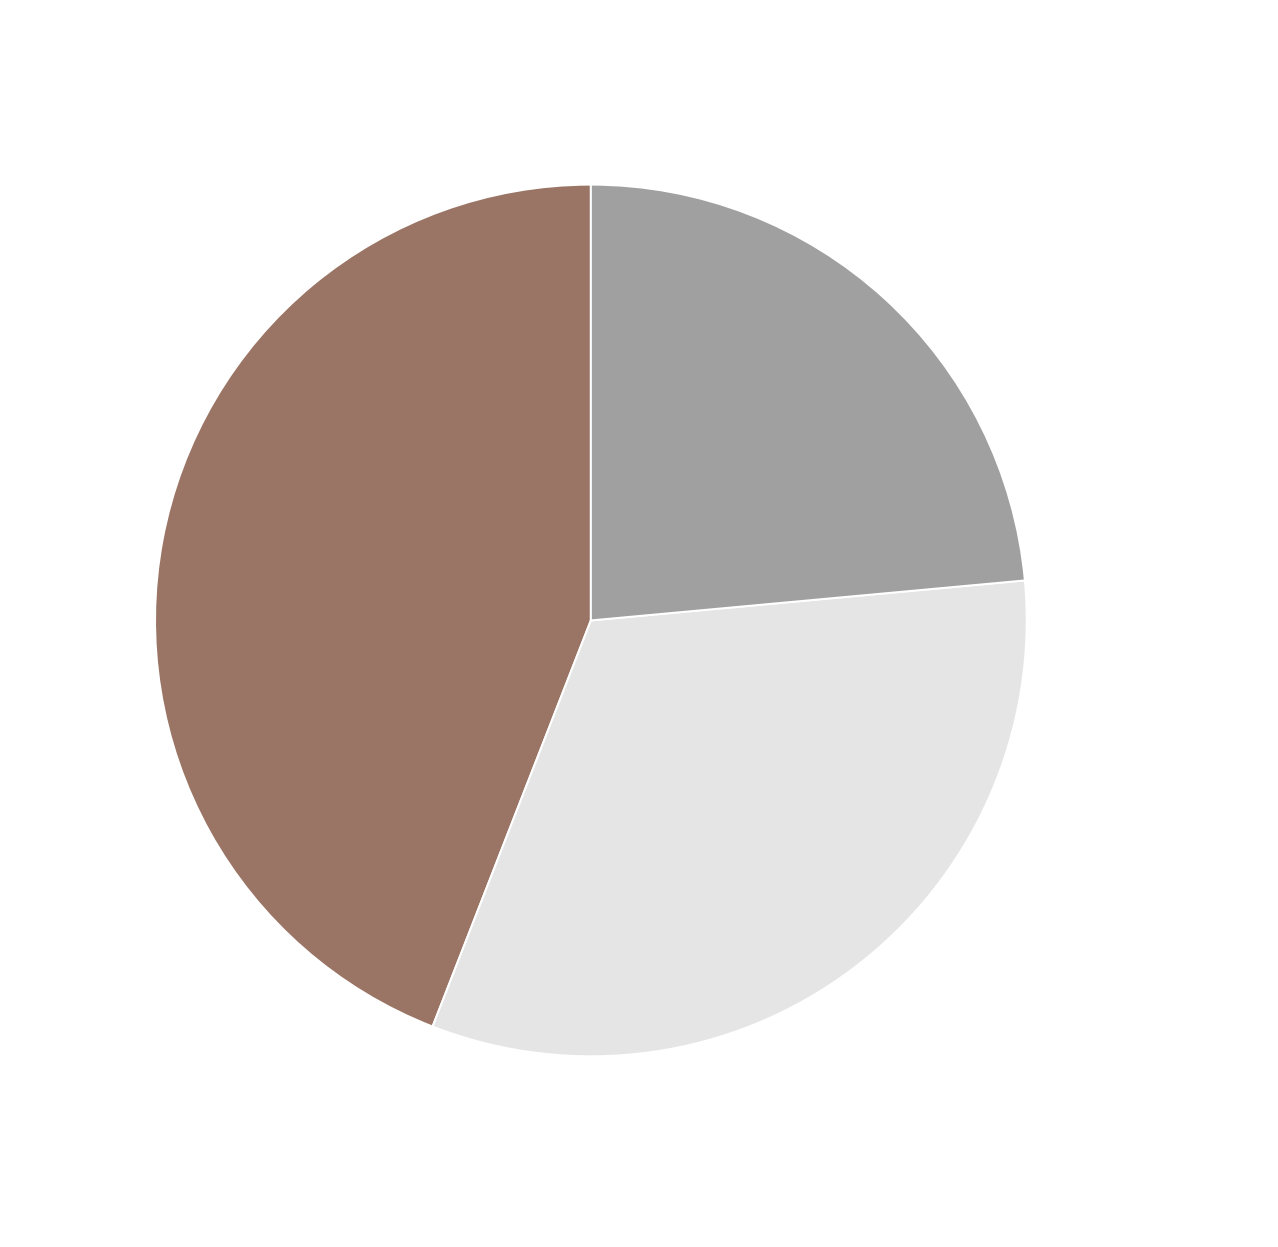

In [89]:
colors = ['#421639','#1b3c31','#a26629']
colors_light = ['#9a7565', '#e5e5e5','#a0a0a0','#a26629']

plt.figure(figsize=(20,20))
sns.set_context('poster',font_scale=4)
plt.pie(
    # using data df
    df_new_role['counts'],
    # with the labels being categories
    labels=df_new_role['unique_values'],
    # with no shadows
    shadow=False,
    # with colors set above 
    colors=colors_light,
    # with the start angle at 90%
    startangle=90,
    # with the percent listed as a fraction
    #autopct='%1.1f%%',
    textprops={'color':'w'}
    )

# View the plot drop above
plt.axis('equal')

# View the plot
plt.tight_layout()
plt.savefig('next_role_light_transparent.png', transparent=True, dpi=300,bbox_inches='tight')
plt.show()

# Career Levels:

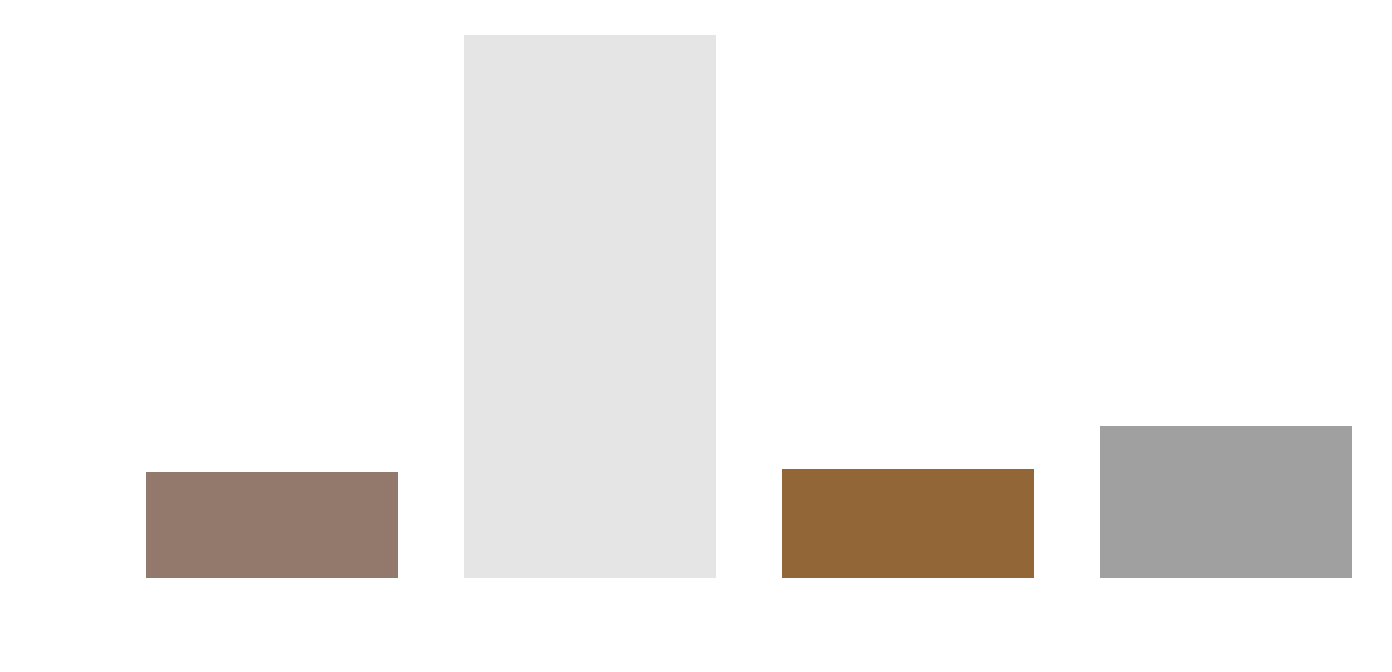

In [91]:
colors_light = ['#9a7565', '#e5e5e5','#a26629','#a0a0a0']
sns.set_palette(sns.color_palette(colors_light))
sns.set_context('poster', font_scale=1.2)
plt.figure(figsize=(20,10))
order = ['Entry','Middle','Senior','Executive']
sns.countplot(x='Career_Level', data=df_mergeFounders, order=order)
plt.xlabel('Career Level',labelpad=20)
plt.ylabel('Number of Attendees',labelpad=20)

sns.set_style('white',{'axes.grid': 'False'})
plt.rcParams.update({'text.color':'white',
                    'axes.labelcolor':'white', 
                    'xtick.color':'white',
                    'ytick.color':'white',
                    'axes.edgecolor':'white'})

plt.tight_layout()
plt.savefig('career_levels_light_transparent.png', transparent=True, dpi=300,bbox_inches='tight')

# Industry

<Figure size 2160x5400 with 0 Axes>

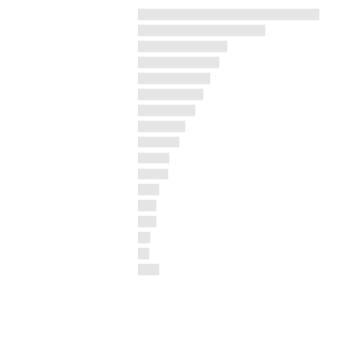

In [94]:
# Purple 421639
# Green 1b3c31
# Gold a26629 
# Gray e5e5e5
# Copper 9a7565

sns.set_context('talk', font_scale=.8)
plt.figure(figsize=(30,75))
order = (['Education', 'Technology', 'Startup', 'Community', 'Finance','Retail',
          'Healthcare','HR','Consulting','Administrative','Marketing',
          'Government','Business','Entertainment','Legal','Energy','Other'])
sns.catplot(y='Industry',data=df_industry,kind='count',color='#e5e5e5',order=order)
plt.ylabel('Industry',labelpad=20)
plt.xlabel('Number of Attendees',labelpad=20)

sns.set_style('white',{'axes.grid': 'False'})
plt.rcParams.update({'text.color':'white',
                    'axes.labelcolor':'white', 
                    'xtick.color':'white',
                    'ytick.color':'white',
                    'axes.edgecolor':'white'})


plt.tight_layout()
plt.savefig('industry_gray_transparent_WhiteText.png', transparent=True, dpi=300,bbox_inches='tight')

# Race

<Figure size 1440x720 with 0 Axes>

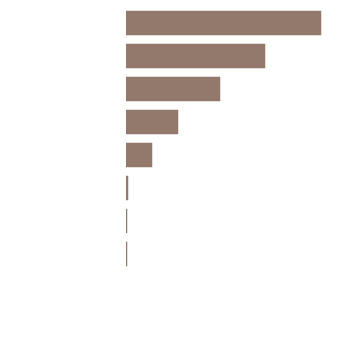

In [96]:
# Purple 421639
# Green 1b3c31
# Gold a26629 
# Gray e5e5e5
# Copper 9a7565

sns.set_context('talk',font_scale=.9)
plt.figure(figsize=(20,10))
order = ['Black', 'Asian', 'Hispanic', 'Multiracial', 'Caucasian','NHPI', 'AIAN', 'Unknown']
sns.catplot(y='race_category',data=df,kind='count',color='#9a7565', order=order)
plt.ylabel('Number of Attendees',labelpad=20)
plt.xlabel('Race',labelpad=20)

sns.set_style('white',{'axes.grid': 'False'})
plt.rcParams.update({'text.color':'white',
                    'axes.labelcolor':'white', 
                    'xtick.color':'white',
                    'ytick.color':'white',
                    'axes.edgecolor':'white'})

plt.tight_layout()
plt.savefig('race_copper_transparent.png', transparent=True, dpi=300,bbox_inches='tight')

### Note:  Top Needs are in another notebook 'FFU_needs_clean' 

### Was trying to change style sheets, but not getting them to appear in the available styles directory - so ignore this. 